In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import string
import gensim
import operator
import re

### Load the data
We will now load the movies data csv into dataframe and quickly peek into the columns and data provided

In [3]:
df = pd.read_csv('/content/drive/MyDrive/semantic search engine/CNN_Articels_clean.csv')
df.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...


In [4]:
df.columns

Index(['Index', 'Author', 'Date published', 'Category', 'Section', 'Url',
       'Headline', 'Description', 'Keywords', 'Second headline',
       'Article text'],
      dtype='object')

In [5]:
df["context"]= df["Headline"]+df["Second headline"]+df["Description"]+df["Article text"]+df["Keywords"]

In [6]:
df["context"].str.len()

0       12758
1        6248
2        3757
3        3670
4        3566
        ...  
4071     2006
4072     1457
4073     4793
4074     3586
4075     3508
Name: context, Length: 4076, dtype: int64

In [7]:
df

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,context
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...","There's a shortage of truckers, but TuSimple t..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,Bioservo's robotic 'Ironhand' could protect fa...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",This swarm of robots gets smarter the more it ...
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor...",Russia is no longer an option for investors. T...
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...,Russian energy investment ban part of new EU s...
...,...,...,...,...,...,...,...,...,...,...,...,...
4071,4725,Story by Reuters,2021-12-01 10:01:29,sport,tennis,https://www.cnn.com/2021/12/01/tennis/australi...,Australian Open: Australia's vaccine mandate i...,The Australian Open's Covid-19 vaccine mandate...,"tennis, Australian Open: Australia's vaccine m...",Australia's vaccine mandate is not to 'blackma...,(Reuters)The Australian Open's Covid-19 vacci...,Australian Open: Australia's vaccine mandate i...
4072,4726,"Homero De la Fuente, CNN",2021-12-01 17:56:15,sport,golf,https://www.cnn.com/2021/12/01/golf/south-afri...,Four golfers test positive ahead of South Afri...,Four golfers scheduled to play in the South Af...,"golf, Four golfers test positive ahead of Sout...",Four golfers test positive ahead of South Afri...,(CNN)Four golfers scheduled to play in the So...,Four golfers test positive ahead of South Afri...
4073,4727,"Amy Woodyatt, CNN",2021-12-01 11:32:15,sport,tennis,https://www.cnn.com/2021/12/01/tennis/peng-shu...,Peng Shuai: 'Unanimous conclusion' that tennis...,Long-time International Olympic Committee (IOC...,"tennis, Peng Shuai: 'Unanimous conclusion' tha...",'Unanimous conclusion' that Peng Shuai is 'fin...,(CNN)Long-time International Olympic Committe...,Peng Shuai: 'Unanimous conclusion' that tennis...
4074,4728,Story by Reuters,2021-12-01 17:27:34,news,europe,https://www.cnn.com/2021/12/01/europe/cow-dung...,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...,"europe, This company is ""zapping"" cow dung wit...",Zapping cow dung with lightning is helping to ...,A Norwegian technology company has found a way...,"This company is ""zapping"" cow dung with lightn..."


### Data Cleaning and Pre-processing
Data pre-processing is one of the most significant step in text analytics. The purpose is to remove any unwanted words or characters which are written for human readability, but won't contribute to topic modelling in anyway.

The following function applies regular expression for matching patterns of unwanted text and removing/replacing them.


In [8]:
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

#create list of punctuations and stopwords
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#function for data cleaning and processing
#This can be further enhanced by adding / removing reg-exps as desired.

def spacy_tokenizer(sentence):

    #remove distracting single quotes
    sentence = re.sub('\'','',sentence)

    #remove digits adnd words containing digits
    sentence = re.sub('\w*\d\w*','',sentence)

    #replace extra spaces with single space
    sentence = re.sub(' +',' ',sentence)

    #remove unwanted lines starting from special charcters
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)

    #remove non-breaking new line characters
    sentence = re.sub(r'\n',' ',sentence)

    #remove punctunations
    sentence = re.sub(r'[^\w\s]',' ',sentence)

    #creating token object
    tokens = spacy_nlp(sentence)

    #lower, strip and lemmatize
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]

    #remove stopwords, and exclude words less than 2 characters
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]

    #return tokens
    return tokens


Now let us apply the data-cleaning and pre-processing function to our movies "wiki_plot" column and store the cleaned, tokenized data into new column

In [9]:

%time df['context_tokenized'] = df['context'].map(lambda x: spacy_tokenizer(x))


df.head()

CPU times: user 13min 6s, sys: 10.6 s, total: 13min 16s
Wall time: 13min 31s


,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,context,context_tokenized
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...","There's a shortage of truckers, but TuSimple t...","[shortage, trucker, tusimple, think, solution,..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,Bioservo's robotic 'Ironhand' could protect fa...,"[bioservos, robotic, ironhand, protect, factor..."
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...",This swarm of robots gets smarter the more it ...,"[swarm, robot, smart, work, cnnthis, swarm, ro..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor...",Russia is no longer an option for investors. T...,"[russia, long, option, investor, emerge, marke..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...,Russian energy investment ban part of new EU s...,"[russian, energy, investment, ban, new, sancti..."


Store the tokenized column into a sepearte variable for ease of operations in subsequent sections and have a quick peek into the values

In [10]:
news_plot_context = df['context_tokenized']
news_plot_context[0:5]

0    [shortage, trucker, tusimple, think, solution,...
1    [bioservos, robotic, ironhand, protect, factor...
2    [swarm, robot, smart, work, cnnthis, swarm, ro...
3    [russia, long, option, investor, emerge, marke...
4    [russian, energy, investment, ban, new, sancti...
Name: context_tokenized, dtype: object

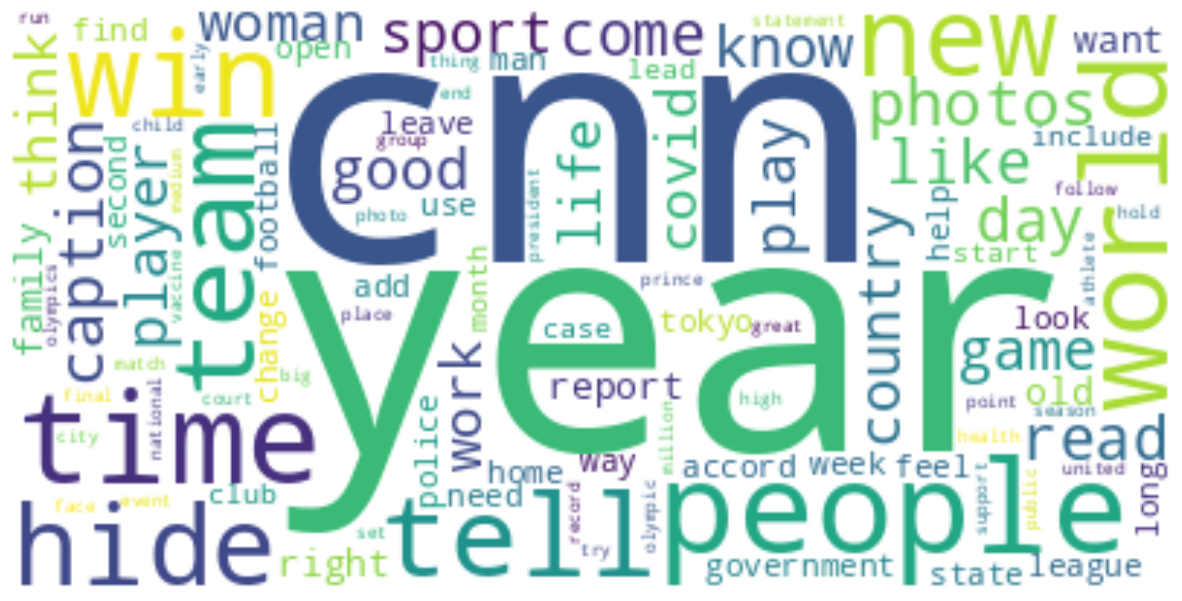

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(news_plot_context)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
def remove_cnn(tokens):
    return [token for token in tokens if token != "cnn"]

# Apply the function to each row in the 'TextTokens' column
df['context_tokenized'] = df['context_tokenized'].apply(remove_cnn)

In [13]:
news_plot_context = df['context_tokenized']
news_plot_context[0:5]

0    [shortage, trucker, tusimple, think, solution,...
1    [bioservos, robotic, ironhand, protect, factor...
2    [swarm, robot, smart, work, cnnthis, swarm, ro...
3    [russia, long, option, investor, emerge, marke...
4    [russian, energy, investment, ban, new, sancti...
Name: context_tokenized, dtype: object

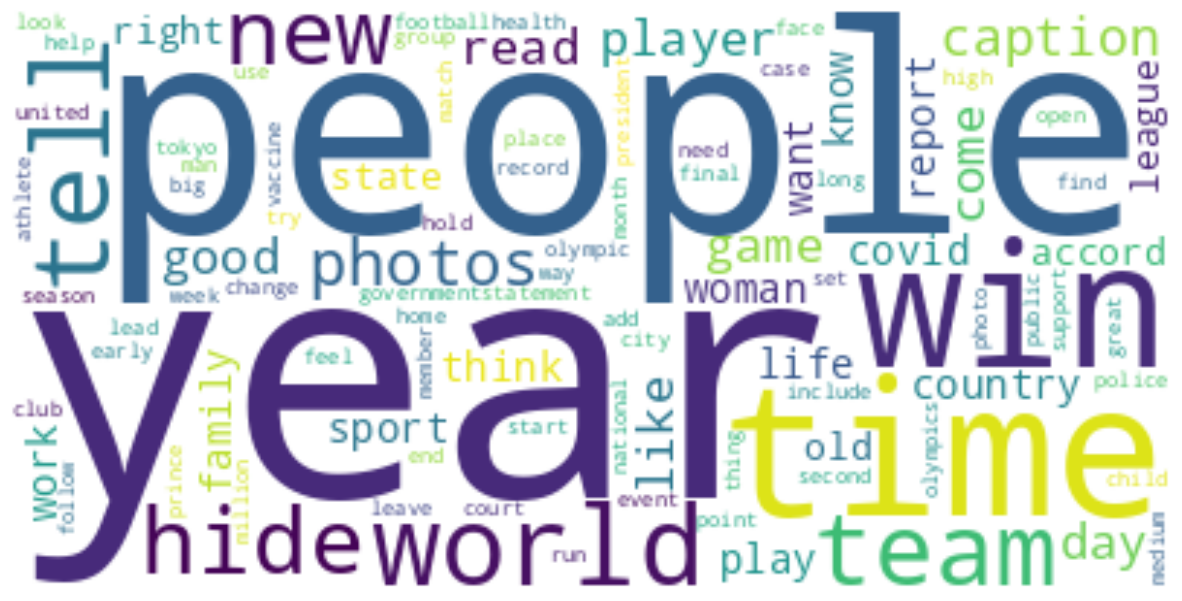

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(news_plot_context)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Building Word Dictionary

In the next step we will build the vocabulary of the corpus in which all the unique words are given IDs and their frequency counds are also stored. You may note that we are using gensim library for building the dictionary.   In gensim, the words are referred as "tokens" adn the index of each word in the dictionary is called ID

In [15]:
from gensim import corpora
from gensim.corpora import Dictionary

#creating term dictionary
context_dictionary = corpora.Dictionary(news_plot_context)



#filter out terms which occurs in less than 4 documents and more than 20% of the documents.
#NOTE: Since we have smaller dataset, we will keep this commented for now.

#dictionary.filter_extremes(no_below=4, no_above=0.2)

#list of few which which can be further removed
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids_c = [context_dictionary.token2id[stopword] for stopword in stoplist if stopword in context_dictionary.token2id]
context_dictionary.filter_tokens(stop_ids_c)


You can see that there are 2 additional steps performed after creating the dictionary.
1. All the tokens in the dictionary which either have occurrred in less than 4 articles or have occurred in more than 20% of the articles are removed from the dictionary, as these words will not be contributing to the various themes or topics.
2. Removing content neutral words from the dictionary and additional stopwords.

In [16]:
#print top 50 items from the dictionary with their unique token-id
dict_tokens_c = [[[context_dictionary[key], context_dictionary.token2id[context_dictionary[key]]] for key, value in context_dictionary.items() if key <= 50]]
print (dict_tokens_c)

[[['able', 0], ['accord', 1], ['add', 2], ['adopt', 3], ['advanced', 4], ['advantage', 5], ['ahead', 6], ['aim', 7], ['air', 8], ['airbus', 9], ['aircraft', 10], ['airline', 11], ['allow', 12], ['alstom', 13], ['alternative', 14], ['altogether', 15], ['annual', 16], ['annually', 17], ['anticipate', 18], ['app', 19], ['aprilli', 20], ['arizona', 21], ['aurora', 22], ['austria', 23], ['autonomous', 24], ['autonomy', 25], ['ava', 26], ['available', 27], ['average', 28], ['aviation', 29], ['away', 30], ['bank', 31], ['base', 32], ['begin', 33], ['belarus', 34], ['believe', 35], ['benefit', 36], ['big', 37], ['bike', 38], ['birkeland', 39], ['board', 40], ['bonanza', 41], ['boom', 42], ['boost', 43], ['border', 44], ['boston', 45], ['bot', 46], ['bottled', 47], ['bowl', 48], ['box', 49], ['bring', 50]]]


### Feature Extraction (Bag of Words)

A bag of words model, or BoW for short is a way of extracting features from text for use in modelling, such as with machine learning algorithms. It is a representation of tet that describes teh occurence of words within a document. It involves two things

1. A vocabulary of known words
2. A measure of the presence of known words

The doc2bow method of dictionary, iterates through all the words in the text, if the word already exists in the corpus, it increments the frequency count, other wise it inserts the word into the corpus and sets it freqeuncy count to 1

In [17]:
corpus = [context_dictionary.doc2bow(desc) for desc in news_plot_context]

word_frequencies = [[(context_dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('able', 2), ('accord', 2), ('add', 3), ('adopt', 1), ('advanced', 1), ('advantage', 2), ('ahead', 1), ('aim', 1), ('air', 2), ('airbus', 1), ('aircraft', 3), ('airline', 3), ('allow', 3), ('alstom', 1), ('alternative', 1), ('altogether', 1), ('annual', 1), ('annually', 1), ('anticipate', 1), ('app', 1), ('aprilli', 1), ('arizona', 2), ('aurora', 1), ('austria', 1), ('autonomous', 8), ('autonomy', 4), ('ava', 1), ('available', 4), ('average', 2), ('aviation', 1), ('away', 1), ('bank', 1), ('base', 5), ('begin', 1), ('belarus', 1), ('believe', 3), ('benefit', 1), ('big', 2), ('bike', 4), ('birkeland', 1), ('board', 2), ('bonanza', 1), ('boom', 2), ('boost', 1), ('border', 1), ('boston', 4), ('bot', 1), ('bottled', 1), ('bowl', 1), ('box', 2), ('bring', 1), ('british', 1), ('brulte', 2), ('build', 4), ('builder', 1), ('bulk', 1), ('bullet', 1), ('bus', 1), ('business', 2), ('bustle', 1), ('cabin', 1), ('camera', 1), ('canadian', 1), ('capacity', 1), ('caption', 21), ('capture', 1), ('c

The above results shows vocabulary with their frequency.

### Build Tf-Idf and LSI Model

Tf-Idf means, Term frequency-Inverse Document Frequency. it is a commonly used NLP model that helps you determine the most important words in each document in the corpus. Once the Tf-Idf is build, pass it to LSI model and specify the num of features to build

In [18]:
news_tfidf_model = gensim.models.TfidfModel(corpus, id2word=context_dictionary)
news_lsi_model = gensim.models.LsiModel(news_tfidf_model[corpus], id2word=context_dictionary, num_topics=300)

Serialize and Store the corpus locally for easy retrival whenver required.

In [19]:
gensim.corpora.MmCorpus.serialize('news_tfidf_model_mm', news_tfidf_model[corpus])
gensim.corpora.MmCorpus.serialize('news_lsi_model_mm',news_lsi_model[news_tfidf_model[corpus]])

In [20]:
#Load the indexed corpus
news_tfidf_corpus = gensim.corpora.MmCorpus('news_tfidf_model_mm')
news_lsi_corpus = gensim.corpora.MmCorpus('news_lsi_model_mm')

print(news_tfidf_corpus)
print(news_lsi_corpus)


MmCorpus(4076 documents, 67134 features, 1039913 non-zero entries)
MmCorpus(4076 documents, 300 features, 1222800 non-zero entries)


In [21]:
from gensim.similarities import MatrixSimilarity

news_index = MatrixSimilarity(news_lsi_corpus, num_features = news_lsi_corpus.num_terms)

## Semantic Engine

In [22]:
from operator import itemgetter

def search_similar_news(search_term):

    query_bow = context_dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = news_tfidf_model[query_bow]
    query_lsi = news_lsi_model[query_tfidf]

    news_index.num_best = 5

    news_list = news_index[query_lsi]

    news_list.sort(key=itemgetter(1), reverse=True)
    news_titles = []

    for j, news in enumerate(news_list):

        news_titles.append (
            {
                'Relevance': round((news[1] * 100),2),
                'News Title': df['Headline'][news[0]],
                'News link': df['Url'][news[0]],
                'News Author': df['Author'][news[0]]
            }

        )
        if j == (news_index.num_best-1):
            break

    return pd.DataFrame(news_titles, columns=['Relevance','News Title','News link','News Author'])


In [23]:
df.columns

Index(['Index', 'Author', 'Date published', 'Category', 'Section', 'Url',
       'Headline', 'Description', 'Keywords', 'Second headline',
       'Article text', 'context', 'context_tokenized'],
      dtype='object')

In [24]:
# search for movie tiles that are related to below search parameters
search_similar_news('accidents')

,Relevance,News Title,News link,News Author
0,77.48,Italy cable car accident: Manslaughter investi...,https://www.cnn.com/2021/05/24/europe/italy-ca...,"Nicola Ruotolo, Barbie Latza Nadeau and Antoni..."
1,76.93,Lake Maggiore: At least 14 killed as Italian c...,https://www.cnn.com/2021/05/23/europe/italy-ca...,"Barbie Latza Nadeau and Nicola Ruotolo, CNN"
2,76.89,Italy cable car accident: Three people arreste...,https://www.cnn.com/2021/05/26/europe/italy-ca...,"Hada Messia and Nicola Ruotolo, CNN"
3,67.62,"Eitan Biran, six-year-old survivor of cable ca...",https://www.cnn.com/2021/10/25/europe/israel-i...,"Amir Tal, CNN"
4,65.73,One killed in Czech cable car accident - CNN,https://www.cnn.com/2021/10/31/europe/czech-ca...,Story by Reuters


The model returns movie titles with "Relevance %". Definitely, the top list movies are related to crimes and drugs.

In [25]:
# search for movie tiles that are related to below search parameters
search_similar_news('violence protest march')

,Relevance,News Title,News link,News Author
0,62.70,Berlin May Day protests: More than 350 arreste...,https://www.cnn.com/2021/05/02/europe/berlin-m...,"Jack Guy and Martin Goillandeau, CNN"
1,57.41,"With UK police under fire, Boris Johnson pushe...",https://www.cnn.com/2021/03/16/uk/uk-crime-bil...,"Analysis by Luke McGee, CNN"
2,53.58,Guatemala: Gender-based violence at epidemic l...,https://www.cnn.com/2015/04/02/world/iyw-guate...,"Julie Guinan, CNN"
3,52.72,Turkey withdraws from Istanbul convention to c...,https://www.cnn.com/2021/03/20/europe/turkey-c...,"Gul Tuysuz and Isil Sariyuce, CNN"
4,52.45,They tried to use rape to silence women protes...,https://www.cnn.com/2019/05/17/africa/sudan-pr...,"Nima Elbagir, Sheena McKenzie, Abdulgader Bash..."


Here the top most movie title "Gandhi" is surely related to non-violence protests

In [26]:
# search for movie tiles that are related to below search parameters
search_similar_news('disaster')

,Relevance,News Title,News link,News Author
0,58.92,Wildlife flourishing in uninhabited areas arou...,https://www.cnn.com/2020/01/07/asia/fukushima-...,Amy Woodyatt
1,55.56,Olympics 2021: An earthquake at torch relay st...,https://www.cnn.com/2021/02/14/sport/japan-ear...,"Blake Essig, Junko Ogura, and Chie Kobayashi, CNN"
2,53.32,Fukushima laments 'unfortunate' lack of fans f...,https://www.cnn.com/2021/07/28/sport/fukushima...,"Blake Essig, Emiko Jozuka and George Ramsay, CNN"
3,47.09,Australia: Parts of New South Wales declare na...,https://www.cnn.com/2021/03/21/australia/austr...,"Jessie Yeung, CNN"
4,40.41,"Japan's Kane Tanaka, the world's oldest living...",https://www.cnn.com/2021/03/04/sport/japan-sup...,"Blake Essig, Junko Ogura and Emiko Jozuka, CNN"
